Import the Necessary Library for SegNet Implementation

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from tensorflow.keras.models import Model


**SegNet Model Definition**

The build_segnet function defines the SegNet model. SegNet is a popular convolutional neural network for semantic segmentation. It has an encoder-decoder structure, where:

The encoder downsamples the input image to a lower resolution, extracting key features.

The decoder upsamples the features back to the original input resolution, generating a segmentation mask.

input_shape: Defines the shape of the input image (224 x 224 RGB images).

num_classes: Specifies the number of segmentation classes (e.g., 80 classes for your dataset).

***Encoder***

The encoder consists of convolutional, batch normalization, ReLU activation, and max pooling layers to downsample the input image while capturing key features.



*   Each encoder block repeats the above pattern:
*   Conv2D: Applies a 3x3 convolution.
*   BatchNormalization: Normalizes the activations.
*   ReLU Activation: Applies ReLU for non-linearity.
*   MaxPooling2D: Downsamples the feature map by a factor of 2.

This process is repeated with increasing filter sizes (64, 128, 256) to capture more complex features.

***Decoder***

The decoder upsamples the features back to the input resolution. Each block includes:

UpSampling2D: Upsamples by a factor of 2.

Conv2D: Applies a 3x3 convolution.

BatchNormalization and Activation: Normalize and add non-linearity.


Output Layer

The final output layer uses a 1x1 convolution with num_classes filters and a softmax activation to produce a probability map for each class at each pixel location.

In [11]:
# SegNet Model Definition
def build_segnet(input_shape=(224, 224, 3), num_classes=21):
    inputs = Input(shape=input_shape)

    # Encoder
    x = Conv2D(64, (3, 3), padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding="same")(x)

    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding="same")(x)

    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), padding="same")(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(256, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    outputs = Conv2D(num_classes, (1, 1), activation="softmax")(x)

    model = Model(inputs, outputs)
    return model

**Compiling the Model**

The model is compiled with:

Adam optimizer for efficient gradient descent.

Sparse categorical cross-entropy loss for multi-class segmentation.

Accuracy metric to monitor performance during training.

In [12]:
# Compile and instantiate the model
input_shape = (224, 224, 3) # Change according to your input data
num_classes = 80  # Set to the number of segmentation classes in your dataset

model = build_segnet(input_shape=input_shape, num_classes=num_classes)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


**Data Preprocessing Function**

The preprocess_data function is a placeholder for loading images and their corresponding masks (segmentation labels). It generates random images and masks here but should be replaced with actual data loading code.

In [13]:
# Sample function to load images and masks (modify as needed to match your dataset)
def preprocess_data(batch_size=8):
    # Your preprocessing code here, similar to the previous example
    images = np.random.rand(batch_size, 224, 224, 3)  # Placeholder: load your images here
    masks = np.random.randint(0, num_classes, (batch_size, 224, 224, 1))  # Placeholder: load your masks here
    return images, masks

**Training Loop**

The training loop runs for a specified number of epochs. For each epoch:

preprocess_data loads a batch of images and masks.
model.fit trains the model for one epoch on the batch.

In [14]:
# Training Loop
epochs = 5
batch_size = 8
for epoch in range(epochs):
    images, masks = preprocess_data(batch_size=batch_size)
    model.fit(images, masks, epochs=1, batch_size=batch_size)
    print(f"Completed epoch {epoch + 1}/{epochs}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step - accuracy: 0.0124 - loss: 4.5823
Completed epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.0121 - loss: 4.5474
Completed epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.0125 - loss: 4.4942
Completed epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.0125 - loss: 4.4541
Completed epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.0123 - loss: 4.4296
Completed epoch 5/5


In [15]:
# Visualize results
import matplotlib.pyplot as plt
sample_images, sample_masks = preprocess_data(batch_size=4)
predictions = model.predict(sample_images)

for i in range(4):
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title("Input Image")

    plt.subplot(1, 3, 2)
    plt.imshow(sample_masks[i].squeeze(), cmap="gray")
    plt.title("Ground Truth Mask")

    plt.subplot(1, 3, 3)
    plt.imshow(np.argmax(predictions[i], axis=-1), cmap="gray")
    plt.title("Predicted Mask")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


The image you provided appears to display the output of a SegNet model for image segmentation. Each panel shows a different part of the segmentation pipeline:

Input Image: This is the input image fed into the SegNet model. The noise suggests it may be randomly generated data (or potentially incorrectly processed data) instead of a meaningful image from a dataset, such as COCO. Ensure that the images are correctly preprocessed and normalized.

Ground Truth Mask: This shows the true segmentation mask for the input image, where each pixel's value corresponds to the class label of the object it belongs to. In this case, it looks like noise rather than a structured mask, indicating that the ground truth data may not have been loaded correctly.

Predicted Mask: This is the segmentation output from the SegNet model. It displays the model’s interpretation of the image, with grayscale intensities corresponding to different classes. The prediction appears patchy, which can happen if the model is not properly trained or if the input data is noisy.

Potential Issues and Fixes
Data Quality: Ensure that the dataset is correctly loaded, and each image corresponds to a valid segmentation mask. The noise-like appearance suggests data might be unprocessed or corrupted.
Training Data: If you’re using placeholder data, switch to actual images and masks from your dataset.
Training Epochs: The model may need more epochs or adjustments in hyperparameters for meaningful results. Segmentation networks typically require more extensive training.
If you correct the data and retrain, you should see structured shapes and boundaries that resemble the objects within the scene. Let me know if you'd like help with specific parts of data preprocessing or further adjustments to the model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


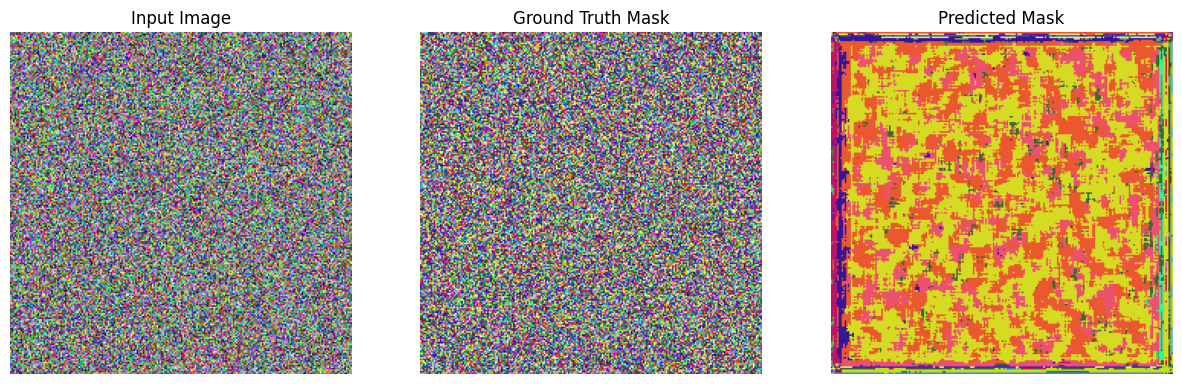

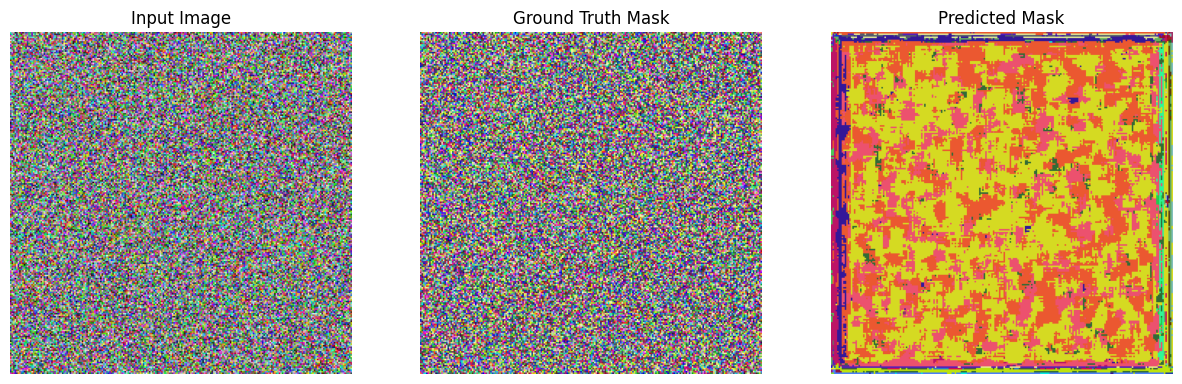

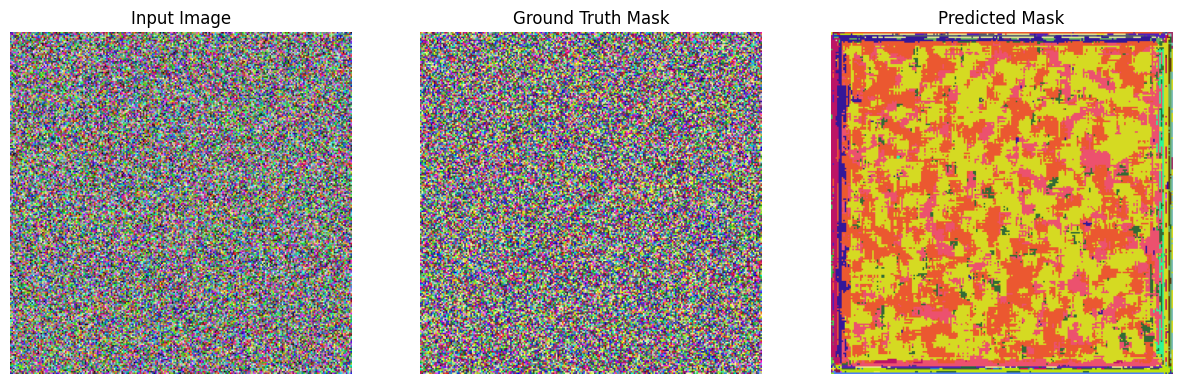

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a color map for your classes (e.g., 80 colors)
# Adjust as needed to match the number of classes in your dataset
def create_color_map(num_classes):
    np.random.seed(42)  # For reproducible colors
    colors = np.random.randint(0, 255, (num_classes, 3))
    return colors

# Function to apply color map to the mask
def colorize_mask(mask, color_map):
    height, width = mask.shape
    color_mask = np.zeros((height, width, 3), dtype=np.uint8)
    for class_id, color in enumerate(color_map):
        color_mask[mask == class_id] = color
    return color_mask

# Define the color map based on the number of classes
color_map = create_color_map(num_classes)

# Display sample images, ground truth masks, and predicted masks in color
sample_images, sample_masks = preprocess_data(batch_size=4)
predictions = model.predict(sample_images)

for i in range(4):
    plt.figure(figsize=(15, 5))

    # Input Image
    plt.subplot(1, 3, 1)
    plt.imshow(sample_images[i])
    plt.title("Input Image")
    plt.axis("off")

    # Ground Truth Mask (Colorful)
    plt.subplot(1, 3, 2)
    gt_mask = sample_masks[i].squeeze()  # Convert to 2D
    color_gt_mask = colorize_mask(gt_mask, color_map)
    plt.imshow(color_gt_mask)
    plt.title("Ground Truth Mask")
    plt.axis("off")

    # Predicted Mask (Colorful)
    plt.subplot(1, 3, 3)
    pred_mask = np.argmax(predictions[i], axis=-1)  # Convert to 2D
    color_pred_mask = colorize_mask(pred_mask, color_map)
    plt.imshow(color_pred_mask)
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.show()


To input your own image for segmentation and visualize the predictions, you can modify the code by adding a function to load your image, resize it to match the model's input size, and then preprocess it before passing it to the model. Here’s how you can adapt the code for custom images:

Load a custom image.

Resize and preprocess the image to match the input shape expected by your model.

Predict and visualize the result.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image

# Define a color map for your classes (e.g., 80 colors)
def create_color_map(num_classes):
    np.random.seed(42)  # For reproducible colors
    colors = np.random.randint(0, 255, (num_classes, 3))
    return colors

# Function to apply color map to the mask
def colorize_mask(mask, color_map):
    height, width = mask.shape
    color_mask = np.zeros((height, width, 3), dtype=np.uint8)
    for class_id, color in enumerate(color_map):
        color_mask[mask == class_id] = color
    return color_mask

# Load and preprocess your custom image
def load_and_preprocess_image(image_path, target_size):
    image = Image.open(image_path)
    image = image.resize(target_size)  # Resize to model's expected input size
    image = np.array(image) / 255.0  # Normalize if needed
    if len(image.shape) == 2:  # Handle grayscale images
        image = np.stack([image] * 3, axis=-1)
    return image

# Define the color map based on the number of classes
num_classes = 80  # Adjust as per your model
color_map = create_color_map(num_classes)

# Load your own image
image_path = "/content/pexels-george-desipris-792381.jpg"
input_image = load_and_preprocess_image(image_path, target_size=(256, 256))  # Adjust target size
input_image_batch = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Predict on the custom image
predictions = model.predict(input_image_batch)

# Visualize the result
plt.figure(figsize=(18, 6))

# Input Image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title("Input Image")
plt.axis("off")

# Predicted Mask (Colorful)
plt.subplot(1, 3, 2)
pred_mask = np.argmax(predictions[0], axis=-1)  # Convert to 2D
color_pred_mask = colorize_mask(pred_mask, color_map)
plt.imshow(color_pred_mask)
plt.title("Predicted Mask")
plt.axis("off")

# Overlay Mask on Input Image with Alpha Blending
plt.subplot(1, 3, 3)
overlay = input_image * 0.7 + color_pred_mask / 255.0 * 0.3  # Blend images with 0.7 input image and 0.3 mask
plt.imshow(overlay)
plt.title("Overlay of Mask on Image")
plt.axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


Explanation of Changes:

Overlay Blending:


The overlay is created by blending the input image and the mask using an alpha value of 0.3 for the mask and 0.7 for the image.
This makes it easier to see where the mask aligns with the input image.

Enhanced Layout:

Increased figure size and used plt.tight_layout() for better spacing between subplots.

Titles and Axes Off:

Clearer titles for each subplot and disabled axis for a cleaner look.

This should provide a more informative and visually appealing way to assess how well the model's predictions align with the input image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


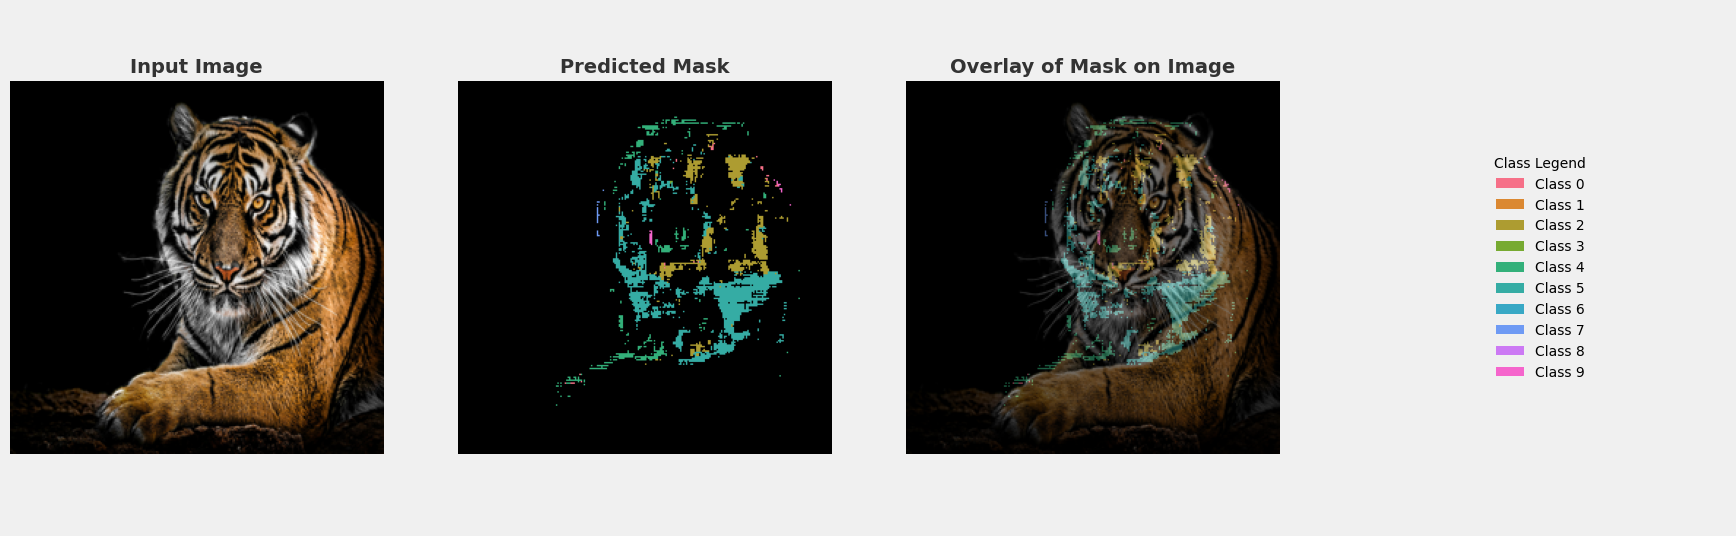

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from matplotlib.patches import Patch

# Define a professional color map using a predefined palette (e.g., seaborn color palette)
def create_color_map(num_classes):
    palette = sns.color_palette("husl", num_classes)  # "husl" gives a balanced color palette
    colors = (np.array(palette) * 255).astype(int)  # Convert to RGB format
    return colors

# Function to apply color map to the mask
def colorize_mask(mask, color_map):
    height, width = mask.shape
    color_mask = np.zeros((height, width, 3), dtype=np.uint8)
    for class_id, color in enumerate(color_map):
        color_mask[mask == class_id] = color
    return color_mask

# Load and preprocess your custom image
def load_and_preprocess_image(image_path, target_size):
    image = Image.open(image_path).convert("RGB")  # Ensure RGB format
    image = image.resize(target_size)  # Resize to model's expected input size
    image = np.array(image) / 255.0  # Normalize
    return image

# Create color map and class names for illustration
num_classes = 10  # Adjust as per your model
color_map = create_color_map(num_classes)
class_names = [f"Class {i}" for i in range(num_classes)]  # Replace with actual class names if available

# Load your own image
image_path = "/content/pexels-george-desipris-792381.jpg"
input_image = load_and_preprocess_image(image_path, target_size=(256, 256))
input_image_batch = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Predict on the custom image
predictions = model.predict(input_image_batch)

# Prepare for Visualization
plt.figure(figsize=(18, 6), facecolor='#f0f0f0')  # Light background for a professional look

# Input Image
plt.subplot(1, 4, 1)
plt.imshow(input_image)
plt.title("Input Image", fontsize=14, fontweight='bold', color='#333333')
plt.axis("off")

# Predicted Mask
pred_mask = np.argmax(predictions[0], axis=-1)  # Convert to 2D
color_pred_mask = colorize_mask(pred_mask, color_map)
plt.subplot(1, 4, 2)
plt.imshow(color_pred_mask)
plt.title("Predicted Mask", fontsize=14, fontweight='bold', color='#333333')
plt.axis("off")

# Overlay of Mask on Input Image
overlay = input_image * 0.5 + color_pred_mask / 255.0 * 0.5  # Blend ratio for clearer visualization
plt.subplot(1, 4, 3)
plt.imshow(overlay)
plt.title("Overlay of Mask on Image", fontsize=14, fontweight='bold', color='#333333')
plt.axis("off")

# Create Legend for Classes in a separate subplot
legend_elements = [Patch(facecolor=np.array(color_map[i])/255, label=class_names[i]) for i in range(num_classes)]
plt.subplot(1, 4, 4)
plt.legend(handles=legend_elements, loc="center", title="Class Legend", frameon=False, fontsize=10)
plt.axis("off")

# Final Layout Adjustments for Professional Look
plt.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()
